In [1]:
from dataset import SNPmarkersDataset
from Regression.LassoNet.lassonet.lassonet.interfaces import LassoNetRegressor
from torch.optim import Adam
from functools import partial

In [3]:
selected_phenotype = "pheno_1"

train_dataset = SNPmarkersDataset(mode="local_train", skip_check=True)
train_dataset.set_phenotypes = selected_phenotype
train_X = train_dataset.get_all_SNP()
train_Y = train_dataset.phenotypes[selected_phenotype]

validation_dataset = SNPmarkersDataset(mode="validation", skip_check=True)
validation_dataset.set_phenotypes = selected_phenotype
validation_X = validation_dataset.get_all_SNP()
validation_Y = validation_dataset.phenotypes[selected_phenotype]

print(f"Train X shape {train_X.shape}")
print(f"Train Y shape {train_Y.shape}")
print(f"Validation X shape {validation_X.shape}")
print(f"Validation Y shape {validation_Y.shape}")

Train X shape (1000, 36304)
Train Y shape (1000,)
Validation X shape (1000, 36304)
Validation Y shape (1000,)


In [12]:
model = LassoNetRegressor(
    hidden_dims=(8,),
    batch_size= 16,
    optim = partial(Adam, lr= 1e-3),
    device="cpu",
    n_iters=50,
    dropout=0.25,
    lambda_seq = [0.1,0.5,1.0]
)

output = model.path(X=train_X, y=train_Y, X_val=validation_X, y_val=validation_Y, return_state_dicts=True)

100%|██████████| 50/50 [00:45<00:00,  1.09it/s, loss=1.73]


In [13]:
for item in output:
    print(item)

HistoryItem(lambda_=0, state_dict={'layers.0.weight': tensor([[-7.7953e-03, -8.1973e-03, -8.7505e-03,  ..., -7.5896e-03,
         -7.3479e-03, -9.7745e-03],
        [-4.0705e-03,  2.1620e-03, -8.2614e-03,  ...,  5.1743e-03,
          2.4573e-03, -2.6698e-04],
        [-7.2682e-03, -3.8064e-03, -7.4556e-03,  ..., -4.6567e-04,
         -1.4543e-03, -2.6848e-03],
        ...,
        [-4.6701e-03,  1.0714e-03, -9.3338e-03,  ..., -4.1714e-03,
         -1.7316e-03, -4.6743e-03],
        [-1.0582e-02, -7.5330e-03, -8.7679e-03,  ..., -1.4937e-03,
          2.4055e-03,  7.9941e-04],
        [-6.1569e-03, -8.3213e-03, -9.1514e-04,  ...,  9.7456e-05,
         -6.2793e-03, -1.3298e-03]]), 'layers.0.bias': tensor([-0.0036, -0.0021, -0.0052,  0.0035, -0.0092, -0.0061, -0.0105, -0.0005]), 'layers.1.weight': tensor([[ 0.2802,  0.1742,  0.0911, -0.1780, -0.0004, -0.2324,  0.2327,  0.2276]]), 'layers.1.bias': tensor([-0.1151]), 'skip.weight': tensor([[-0.0047, -0.0166,  0.0037,  ...,  0.0146,  0.0122, 

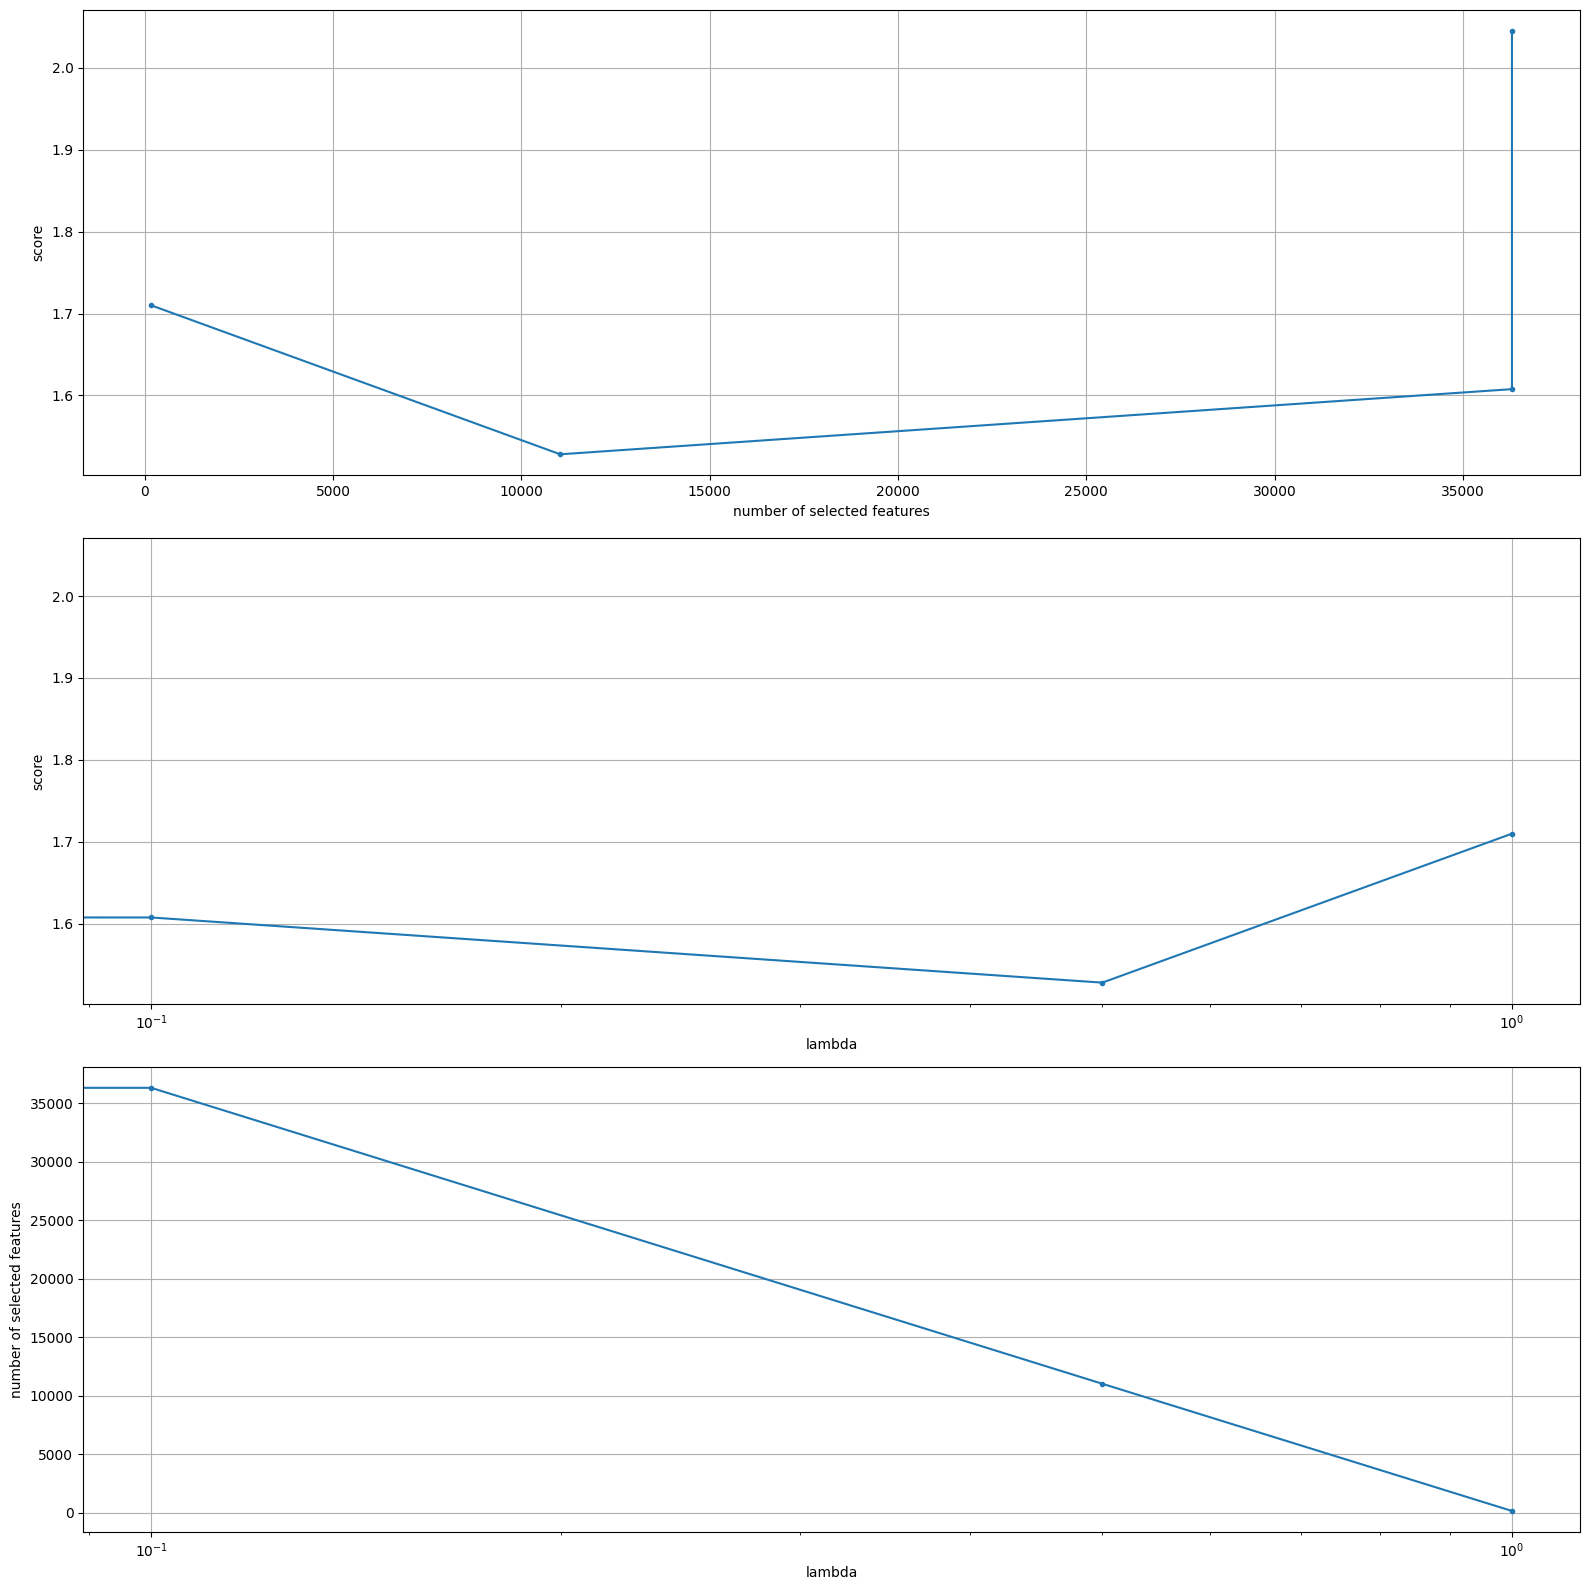

In [15]:
from Regression.LassoNet.lassonet.lassonet.plot import plot_path
from sklearn.metrics import mean_absolute_error
%matplotlib inline

plot_path(model, output, validation_X, validation_Y, score_function=mean_absolute_error)